# Исследование интернет-магазина компьютерных игр

**Задача проекта**
- Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры.

**Имеющиеся данные**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Период данных**
- до 2016 года

**План работы:**
- Открытие файла с данными и изучение общей информации
- Предобработка данных, в т.ч. подсчет суммарных продаж во всех регионах
- Исследовательский анализ данных (характерный срок появления новых и исчезание старых платформ, определение потенциально прибыльных платформ и жанров и т.д.) 
- Составление портрета пользователя каждого региона (самые популярные платформы и жанры, влияние рейтинга на продажи)
- Проверка гипотез, связанные со средними пользовательскими рейтингами жанров и платформ.
- Написание общего вывода по результатам исследования

<div style="border-radius: 15px; border: 3px solid Black; padding: 15px;">
    <b> Оглавление </b>
    
1.[Изучение общей информации](#step1)

2.[Предобработка данных](#step2)

3.[Исследовательский анализ данных](#step3)

4.[Составление портрета пользователя](#step4)

5.[Проверка гипотез](#step5)

6.[Общий вывод](#step6)

<a id="step1"></a>
## 1. Изучение общей информации

Импортируем библиотеки для работы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import copy

Выгрузим файл и определим количество пропущенных значений и тип данных

In [2]:
data = pd.read_csv('D:\games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Комментарий:** имеются столбцы, где есть пропущенные значения. Имеются столбцы, где тип данных указан не верно (год выпуска, оценка пользователей).

Выведем датасет на экран

In [3]:
display(data.head(1))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


**Комментарий:** необходимо изменить формат названий столбцов (привести к нижнему регистру).

Построим графики (гистограммы) распределения значений по столбцам

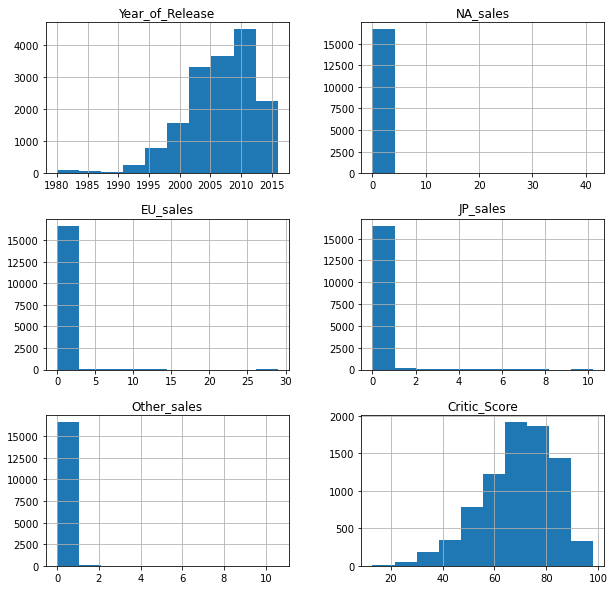

In [4]:
data.hist(figsize=(10, 10));

<a id="step2"></a>
## 2. Предобработка данных

### 2.1 Замена названий столбцов (приведение к нижнему регистру)

Приведение к нижнему регистру названий столбцов

In [5]:
data.columns = data.columns.str.lower()

Проверка изменений

In [6]:
data.head(0)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### 2.2 Обработка пропущенных значений и изменение типов данных

**Поиск пропущенных значений**

Определим количество пропущенных значений в столбцах

In [7]:
data.isna().sum().to_frame(name='nans').query('nans > 0')['nans'].sort_values(ascending = False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
Name: nans, dtype: int64

Построим график по пропущенным значениям в столбцах

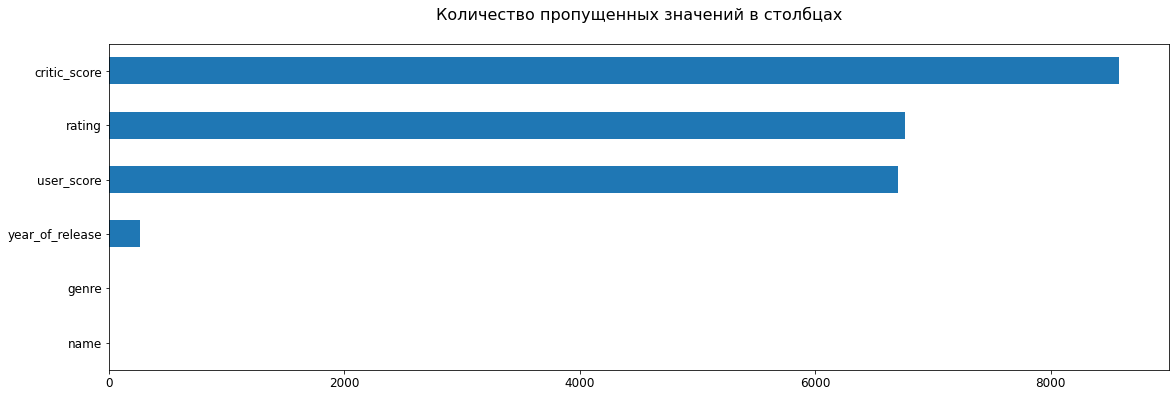

In [8]:
(
    data   
# Поиск пропущенных значений
    .isna() 
# Суммируем пропущенные значения    
    .sum()  
# преобразуем во фрейм данных    
    .to_frame(name='nans')
# количество пропущенных значений - больше 0
    .query('nans > 0')['nans'] 
# сортируем    
    .sort_values() 
    .plot(kind= 'barh', rot = 0, figsize=(19,6), legend = False, fontsize = 12) #строим график
    .set_title('Количество пропущенных значений в столбцах' + "\n", fontsize = 16) # работа с названием графика
); 

**Вывод:** 
- пропущенные значения имеются в столбцах с оценкой пользователей, оценкой критиков, рейтингом от организации ESRB, годом выпуска игры, названием игры и жанром.

**Обработка столбцов "name" и "genre"**

Проверим гипотезу - по тем строчкам, где нет названия игры, не указан жанр, т.к. по ним - по 2 пропуска

In [9]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Проверка количества строк перед внесением изменений

In [10]:
data.shape

(16715, 11)

Удаление строк, где пропущены названия игры и жанров, т.к. 2 - это гораздо меньше 1% всех строчек и по этим строчкам есть еще пустые ячейки по 3 столбцам

In [11]:
data = data.dropna(subset = ['name'])

Проверка количества строк после внесения изменений

In [12]:
data.shape

(16713, 11)

**Вывод:**
- пропуск с жанром связан с пропуском названия игры, следовательно заменять на пропуски какими-либо значениями не имеет смысла
- были удалены строки в связи с их малочисленностью (2 строки), таким образом избавились от части пропусков

**Обработка столбца "user_score"**

Работа с user_score (оценка пользователей), обработка tbd.

Tbd - to be determined - то что будет определено (подлежит опредлению), т.е. оценка неизвестна, следовательно заменим на NaN.

In [13]:
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan
data['user_score'].loc[data['user_score'] == 'tbd'].count()

0

Изменение типа данных данного столбца

In [14]:
data['user_score'] = data['user_score'].astype('float')

Определение причины пропусков в столбце user_score

In [15]:
print('Количество уникальных игр:',data['name'].unique().shape[0])
print('Количество пропусков в столбце с оценкой пользователей:', data['user_score'].isna().sum())

print('Количество уникальных оценок пользователей:',data['user_score'].unique().shape[0])
print('% пропусков в столбце с оценкой пользователей:', \
      ((data['user_score'].isna().sum()/data['user_score'].shape[0])*100).round())

Количество уникальных игр: 11559
Количество пропусков в столбце с оценкой пользователей: 9123
Количество уникальных оценок пользователей: 96
% пропусков в столбце с оценкой пользователей: 55.0


**Вывод:**
- Причина пропусков в столбцах с оценками пользователей: причина пропусков явно не связана с рейтингом ESRB, т.к. имеются игры, по которым не заполнен рейтинг, но имеется оценка. Возможные причины могут быть связаны с тем, что база данных по оценкам могла потеряться, либо игры были не популярны и поэтому рейтинг по ним не сформировался, либо игры были выпущены недавно и еще не успели поставить оценки играм (2016 год), либо игры были выпущены очень давно (до 2000 года) и тогда так не оценивали игры
- доля пропусков в столбце "user_score" больше половины, поэтому удалять строки с этими значениями нельзя
- уникальных игр очень много (больше 50%), количество оценок также не мало (96), доля пропусков в столбце "user_score" больше половины, поэтому целесообразно не заменять пропуски в столбце

**Обработка столбца "year_of_release"**

Определение причин пропусков в столбце year_of_release

In [16]:
print('Количество уникальных игр:',data['name'].unique().shape[0])
print('Количество пропусков в столбце с годом выпуска игр:', data['year_of_release'].isna().sum())
print('Количество уникальных лет выпуска игр:',data['year_of_release'].unique().shape[0])
print('% пропусков в столбце с годом выпуска:', \
      ((data['year_of_release'].isna().sum()/data['year_of_release'].shape[0])*100).round(2))

Количество уникальных игр: 11559
Количество пропусков в столбце с годом выпуска игр: 269
Количество уникальных лет выпуска игр: 38
% пропусков в столбце с годом выпуска: 1.61


Проверка количества строк перед внесений изменений

In [17]:
data.shape

(16713, 11)

Удаление строк, где в столбце с годом выпуска имеются пропуски, т.к. количество пропусков небольшое, менее 2% всех строк, а по уникальным названиям игр подставлять год нецелесообразно, т.к. одна игра может выходить на разных платформах, переиздоваться и т.п.

In [18]:
data = data.dropna(subset = ['year_of_release'])

Изменение типа данных столбца 

In [19]:
print(data['year_of_release'].astype('int').head(2))

0    2006
1    1985
Name: year_of_release, dtype: int32


Проверка количества строк после внесенных изменений

In [20]:
data.shape

(16444, 11)

**Вывод:**
- пропуски в столбце возможны связаны с потерью части данных по играм, либо с небольшим производителем игры, поэтому данные не указаны
- пропуски с столбце с годами были удалены по причине их малочисленности (менее 2%) и некорректности подстановки значений из строк со схожими названиями игр
- тип данных был изменен

**Обработка столбца "critic_score"**

Определение причин пропусков в столбце critic_score

In [21]:
print('Количество уникальных игр:',data['name'].unique().shape[0])
print('Количество пропусков в столбце с оценкой критиков:', data['critic_score'].isna().sum())
print('Количество уникальных оценок критиков:',data['critic_score'].unique().shape[0])
print('% пропусков в столбце с оценкой критиков:', ((data['critic_score']
                                                      .isna().sum()/data['critic_score'].shape)*100).round(2))

Количество уникальных игр: 11426
Количество пропусков в столбце с оценкой критиков: 8461
Количество уникальных оценок критиков: 82
% пропусков в столбце с оценкой критиков: [51.45]


**Вывод:**
- Причина пропусков в столбцах с оценками критиков: причина пропусков явно не связана с рейтингом ESRB, т.к. имеются игры, по которым не заполнен рейтинг, но имеется оценка. Возможные причины могут быть связаны с тем, что база данных по оценкам могла потеряться, либо игры были не популярны и поэтому рейтинг по ним не сформировался, либо игры были выпущены недавно и еще не успели поставить оценки играм (2016 год), либо игры были выпущены очень давно (до 2000 года) и тогда так не оценивали игры
- пропуски в столбце с оценкой критиков не были удалены по причине их многичиленности (более 50%), большого количества уникальных названий игр и некорректности подстановки значений из строк со схожими названиями игр

**Обработка столбца "rating"**

Определение причин пропусков в столбце rating

In [22]:
print('Количество уникальных игр:',data['name'].unique().shape[0])
print('Количество пропусков в столбце с рейтингом:', data['rating'].isna().sum())
print('Количество уникальных рейтингов:',data['rating'].unique().shape[0])
print('% пропусков в столбце с годом выпуска:', ((data['rating'].isna().sum()/data['rating'].shape[0])*100).round(2))

Количество уникальных игр: 11426
Количество пропусков в столбце с рейтингом: 6676
Количество уникальных рейтингов: 9
% пропусков в столбце с годом выпуска: 40.6


Заполнение пропущенных значений в столбце rating

In [23]:
data['rating'] = data['rating'].fillna('unrated')

**Вывод:**
- пропуски в столбце с рейтингом игры не были удалены по причине их многичиленности (более 40%)
- пропуски в стобце с рейтингом игры были изменены на "unrated"
- возрастной рейтинг видеоигр присваивается для того, чтобы оградить неокрепшую психику детей от вредных факторов, которые могут быть в видеоиграх (чрезмерная жестокость, например)
- Причина пропусков в столбце с рейтингом: рейтинги ESRB дейтвительны в США и Канаде. Если смотреть  также на таблицу, где в столбце с рейтингом - unrated, то видно, что большая часть продаж - это Северная Америка, то становится понятно, что пропуски с рейтингом вызваны тем, что страна производства игры - не Северная Америка. Поэтому рейтинга просто нет, поэтому пропуски. 

**2.3 Подсчет суммарных продаж игр**

Добавление нового столбца, где будут продажи по всем регионам

In [24]:
data['all_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns')
data['all_sales'].head(2)

0    82.54
1    40.24
Name: all_sales, dtype: float64

<a id="step3"></a>
## 3. Исследовательский анализ данных

### 3.1 Изменение продаж игр по годам

Построение графика зависимости количества игр от года выпуска

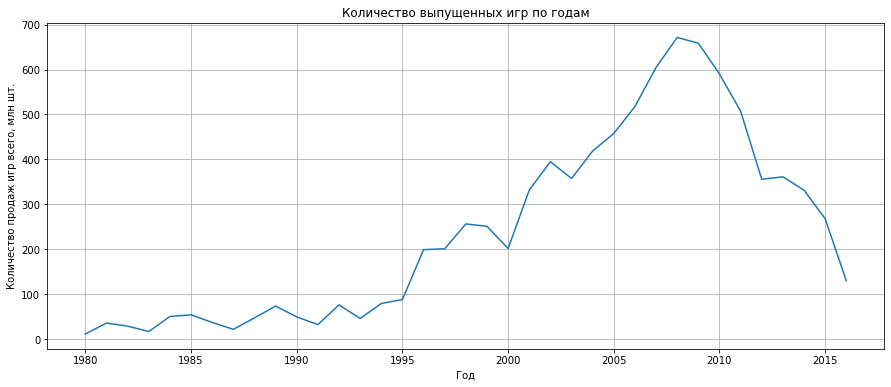

In [25]:
(data.pivot_table(index = 'year_of_release', values = 'all_sales', aggfunc='sum')
                .plot(grid = True,title = 'Количество выпущенных игр по годам',figsize=(15, 6),legend = False)
                .set(xlabel = 'Год',ylabel = 'Количество продаж игр всего, млн шт.'));

**Вывод:**
- Больше всего игр было продано примерно в 2013 году, после этого ситуация начала ухудшаться и продажи стабильно падают
- Жизненный цикл выбранных платформ подходит к концу, чему мы видим на следующем графике (кроме PS4 - падение не сильное)
- Исходя из этого графика данный вывод не очевиден. но возможно рынок мобильных игр растет, а рынок привычных платформ, популярных в 2000-х годах падает (мобильный гейминг захватывает рынок). 

### 3.2 Изменение продаж игр по платформам по годам

Пострение графика изменения продаж игр по платформам по годам

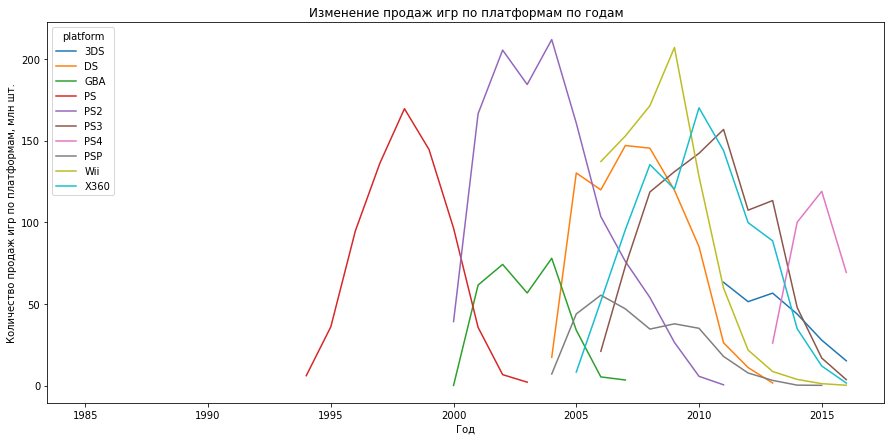

In [26]:
platform_all_sales = data.pivot_table(index='platform', values='all_sales', aggfunc='sum').nlargest(10, 'all_sales').index 

(data
     .query('platform in @platform_all_sales')
     .pivot_table(index = 'year_of_release', columns = 'platform', values= 'all_sales', aggfunc = 'sum')
     .plot(figsize = (15,7), title = 'Изменение продаж игр по платформам по годам')
     .set(xlabel = 'Год',ylabel = 'Количество продаж игр по платформам, млн шт.'));

Выявление данных, которые не отразились на графике

In [27]:
(
    data
     .query('platform in @platform_all_sales')
     .pivot_table(index = 'year_of_release', columns = 'platform', values= 'all_sales', aggfunc = 'sum')
)

platform,3DS,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1985.0,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994.0,NaN,NaN,NaN,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995.0,NaN,NaN,NaN,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996.0,NaN,NaN,NaN,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997.0,NaN,NaN,NaN,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998.0,NaN,NaN,NaN,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999.0,NaN,NaN,NaN,144.53,NaN,NaN,NaN,NaN,NaN,NaN
2000.0,NaN,NaN,0.07,96.37,39.17,NaN,NaN,NaN,NaN,NaN
2001.0,NaN,NaN,61.53,35.59,166.43,NaN,NaN,NaN,NaN,NaN


**Комментарий:**
- по платформе есть одна продажа, которое сильно выбивается - в 1985 г. Поэтому учитывать в дальнейшим ее не будем

Поиск строки с данной продажей в датасете

In [28]:
data[(data['year_of_release'] == 1985) & (data['platform'] == 'DS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,unrated,0.02


### 3.3 Рассчитаем срок существования платформы, сроки роста и падения продаж платформы

Рассмотрим те платформы с наибольшими суммарными продажами, игры по которым в 2016 уже не продавались

**PS2**

Определим срок жизни платформы PS2 (из крайнего года выпуска по платформе PS2 (max) вычитает начальный год выпуска по платформе PS2 (min))

In [29]:
lifetime_PS2 = (
    data
    .query('platform in @platform_all_sales')
    .query('platform == "PS2"')['year_of_release']
    .max() -\
    data
    .query('platform in @platform_all_sales')
    .query('platform == "PS2"')['year_of_release']
    .min()
)
print('Срок жизни PS2:', lifetime_PS2,'лет')

Срок жизни PS2: 11.0 лет


Определим количество лет роста продаж игр на платформе PS2 (из среднего года выпуска по платформе PS2 (mean) вычитает начальный год выпуска по платформе PS2 (min))

In [30]:
increase_PS2 = (
    data
    .query('platform in @platform_all_sales')
    .query('platform == "PS2"')['year_of_release']
    .mean() -\
    data
    .query('platform in @platform_all_sales')
    .query('platform == "PS2"')['year_of_release']
    .min()
)
print('Рост PS2:', round(increase_PS2),'лет')

Рост PS2: 5 лет


Определим количество лет падения продаж игр на PS2 (из крайнего года выпуска по платформе PS2 (max) вычитает средний год выпуска по платформе PS2 (mean))

In [31]:
decrease_PS2 = (
    data
    .query('platform in @platform_all_sales')
    .query('platform == "PS2"')['year_of_release']
    .max() -\
    data
    .query('platform in @platform_all_sales')
    .query('platform == "PS2"')['year_of_release']
    .mean()
)
print('Падение PS2:', round(decrease_PS2),'лет')

Падение PS2: 6 лет


**DS**

Определим срок жизни платформы DS (из крайнего года выпуска по платформе DS (max) вычитает начальный год выпуска по платформе DS (min))

In [32]:
lifetime_DS = (
    data
    .query('platform in @platform_all_sales')
    .query('platform == "DS" & year_of_release != 1985')['year_of_release']
    .max()-\
    data
    .query('platform in @platform_all_sales')
    .query('platform == "DS" & year_of_release != 1985')['year_of_release']
    .min()
)
print('Срок жизни DS:', round(lifetime_DS),'лет')

Срок жизни DS: 9 лет


Определим количество лет роста продаж игры на платформе DS (из среднего года выпуска по платформе DS (mean) вычитает начальный год выпуска по платформе DS (min))

In [33]:
increase_DS = (
    data
    .query('platform in @platform_all_sales')
    .query('platform == "DS" & year_of_release != 1985')['year_of_release']
    .mean() -\
    data
    .query('platform in @platform_all_sales')
    .query('platform == "DS" & year_of_release != 1985')['year_of_release']
    .min()
)
print('Рост DS:',round(increase_DS),'лет')

Рост DS: 4 лет


Определим количество лет падения продаж игра на платформе DS (из крайнего года выпуска по платформе DS (max) вычитает средний год выпуска по платформе DS (mean))

In [34]:
decrease_DS = (
    data
    .query('platform in @platform_all_sales')
    .query('platform == "DS" & year_of_release != 1985')['year_of_release']
    .max()-\
    data
    .query('platform in @platform_all_sales')
    .query('platform == "DS" & year_of_release != 1985')['year_of_release']
    .mean()
              )
print('Падение DS:', round(decrease_DS),'лет')

Падение DS: 5 лет


**PSP**

Определим срок жизни платформы PSP (из крайнего года выпуска по платформе PSP (max) вычитает начальный год выпуска по платформе PSP (min))

In [35]:
lifetime_PSP = (
    data
    .query('platform in @platform_all_sales')
    .query('platform == "PSP"')['year_of_release']
    .max() -\
    data
    .query('platform in @platform_all_sales')
    .query('platform == "PSP"')['year_of_release']
    .min()
    )
print('Срок жизни PSP:', round(lifetime_PSP),'лет')

Срок жизни PSP: 11 лет


Определим количество лет роста продаж игр на платформе PSP (из среднего года выпуска по платформе PSP (mean) вычитает начальный год выпуска по платформе PSP (min))

In [36]:
increase_PSP = (
    data
    .query('platform in @platform_all_sales')
    .query('platform == "PSP"')['year_of_release']
    .mean() -\
    data
    .query('platform in @platform_all_sales')
    .query('platform == "PSP"')['year_of_release']
    .min()
)
print('Рост PSP:',round(increase_PSP),'лет')

Рост PSP: 5 лет


Определим количество лет падения продаж по платформе PSP (из крайнего года выпуска по платформе PSP (max) вычитает средний год выпуска по платформе PSP (mean))

In [37]:
decrease_PSP = (
    data
    .query('platform in @platform_all_sales')
    .query('platform == "PSP"')['year_of_release']
    .max() -\
    data
    .query('platform in @platform_all_sales')
    .query('platform == "PSP"')['year_of_release']
    .mean()
)
print('Падение PSP:', round(decrease_PSP),'лет')

Падение PSP: 6 лет


**PS**

Определим срок жизни платформы PS (из крайнего года выпуска по платформе PS (max) вычитает начальный год выпуска по платформе PS (min))

In [38]:
lifetime_PS = (
    data
    .query('platform in @platform_all_sales')
    .query('platform == "PS"')['year_of_release']
    .max() -\
    data
    .query('platform in @platform_all_sales')
    .query('platform == "PS"')['year_of_release']
    .min()
)
print('Срок жизни PS:', round(lifetime_PS),'лет')

Срок жизни PS: 9 лет


Определим количесто лет роста продаж игр на платформе PS (из среднего года выпуска по платформе PS (mean) вычитает начальный год выпуска по платформе PS (min)

In [39]:
increase_PS = (
    data
    .query('platform in @platform_all_sales')
    .query('platform == "PS"')['year_of_release']
    .mean() -\
    data
    .query('platform in @platform_all_sales')
    .query('platform == "PS"')['year_of_release']
    .min()
)
print('Рост PS:', round(increase_PS),'лет')

Рост PS: 4 лет


Определим количество лет падения продаж игр на платформе PS (из крайнего года выпуска по платформе PS (max) вычитает средний год выпуска по платформе PS (mean))

In [40]:
decrease_PS = (
    data
    .query('platform in @platform_all_sales')
    .query('platform == "PS"')['year_of_release']
    .max() -\
    data
    .query('platform in @platform_all_sales')
    .query('platform == "PS"')['year_of_release']
    .mean()
)
print('Падение PS:', round(decrease_PS),'лет')

Падение PS: 5 лет


**GBA**

Определим срок жизни платформы GBA (из крайнего года выпуска по платформе GBA (max) вычитает начальный год выпуска по платформе GBA (min))

In [41]:
lifetime_GBA = (
    data
    .query('platform in @platform_all_sales')
    .query('platform == "GBA"')['year_of_release']
    .max() -\
    data
    .query('platform in @platform_all_sales')
    .query('platform == "GBA"')['year_of_release']
    .min()
)
print('Срок жизни GBA:', round(lifetime_GBA),'лет')

Срок жизни GBA: 7 лет


Определим количество лет роста продаж игр на платформе GBA (из среднего года выпуска по платформе GBA (mean) вычитает начальный год выпуска по платформе GBA (min))

In [42]:
increase_GBA = (
    data
    .query('platform in @platform_all_sales')
    .query('platform == "GBA"')['year_of_release']
    .mean() -\
    data
    .query('platform in @platform_all_sales')
    .query('platform == "GBA"')['year_of_release']
    .min()
)
print('Рост GBA:', round(increase_GBA),'лет')

Рост GBA: 3 лет


Определим количество лет падения продаж игр на GBA (из крайнего года выпуска по платформе GBA (max) вычитает средний год выпуска по платформе GBA (mean))

In [43]:
decrease_GBA = (
    data
    .query('platform in @platform_all_sales')
    .query('platform == "GBA"')['year_of_release']
    .max() -\
    data
    .query('platform in @platform_all_sales')
    .query('platform == "GBA"')['year_of_release']
    .mean()
)
print('Падение GBA:', round(decrease_GBA),'лет')

Падение GBA: 4 лет


### 3.4 Cредняя продолжительность жизни по платформам PS2, DS, PSP, PS и GBA

Посчитаем среднюю продолжительность жизни топ-5 платформ, по которым уже не продают игры

In [44]:
average_lifetime = (lifetime_PS2 + lifetime_DS + lifetime_PSP + lifetime_PS + lifetime_GBA)/5
print('Средний срок продаж игр на платформе:',average_lifetime,'лет')

Средний срок продаж игр на платформе: 9.4 лет


Посчитаем средний срок роста продаж игр на топ-5 платформах, по которым уже не продают игры

In [45]:
average_increase = (increase_PS2 + increase_DS + increase_PSP + increase_PS + increase_GBA)/5
print('Средний срок роста продаж игр на платформе:', round(average_increase,1),'лет')

Средний срок роста продаж игр на платформе: 4.1 лет


Посчитаем средний срок ухудшения продаж игр на топ-5 платформах, по которым уже не продают игры

In [46]:
average_decrease = (decrease_PS2 + decrease_DS + decrease_PSP + decrease_PS + decrease_GBA)/5
print('Средний срок падения продаж игр на платформе', round(average_decrease,1),'лет')

Средний срок падения продаж игр на платформе 5.3 лет


**Вывод:**
- средний срок существования определенной платформы - 9,4 лет
- средний срок роста продаж по платформе - 4,1 лет
- средний срок падения продаж по платформе - 5,3 лет
- когда продажи по платформе начинают падать - появляется новые платформы

### 3.5 Определение актуального периода для дальнейшего исследования

Сделаем сред датасета по годам (2014 - 2016 гг.)

In [47]:
data_after_2014 = data[data['year_of_release'] >= 2014]

Построим графики, чтобы определить, какие платформы на 2016 год - потенциально прибыльные

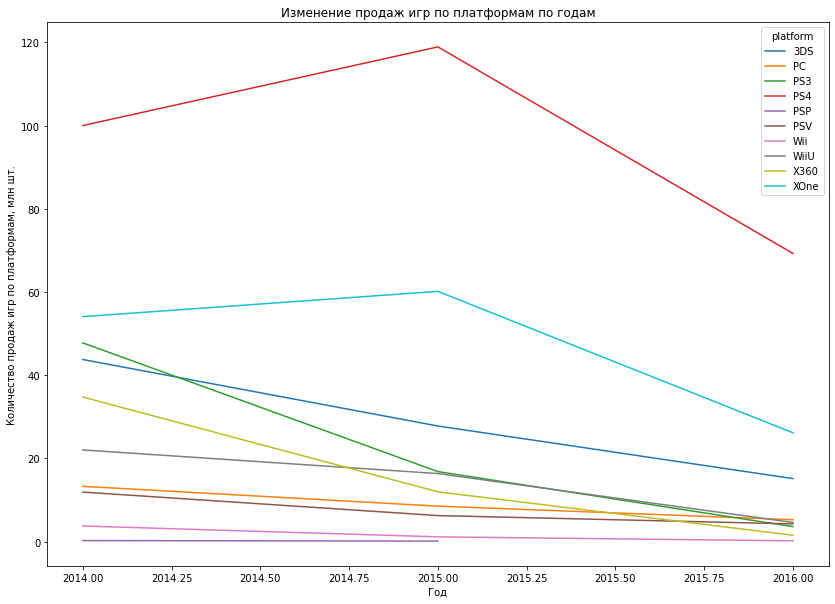

In [48]:
platform_all_sales = (data_after_2014
                      .pivot_table(index='platform', values='all_sales', aggfunc='sum')
                      .index)

(data_after_2014
     .query('platform in @platform_all_sales')
     .pivot_table(index = 'year_of_release', columns = 'platform', values= 'all_sales', aggfunc = 'sum')
     .plot(figsize = (14,10), title = 'Изменение продаж игр по платформам по годам')
     .set(xlabel = 'Год',ylabel = 'Количество продаж игр по платформам, млн шт.'));

**Вывод:**
- платформа PS4 лидирует по продажам, платформы XOne и 3DS также выделяются среди других платформ по количеству продаж, но по ним продажи значительно меньше PS4
- начиная примерно с 2015 года ни по одной платформе продажи игр не увеличиваются
- с 2014 по 2015 имелся рост продаж по 2 платформам - PS4 и XOne
- Таким образом, потенциально прибыльные платформы - PS4, XOne и 3DS (в особенности - PS4)

### 3.6 График «ящик с усами» по глобальным продажам игр в разбивке по платформам

Строим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

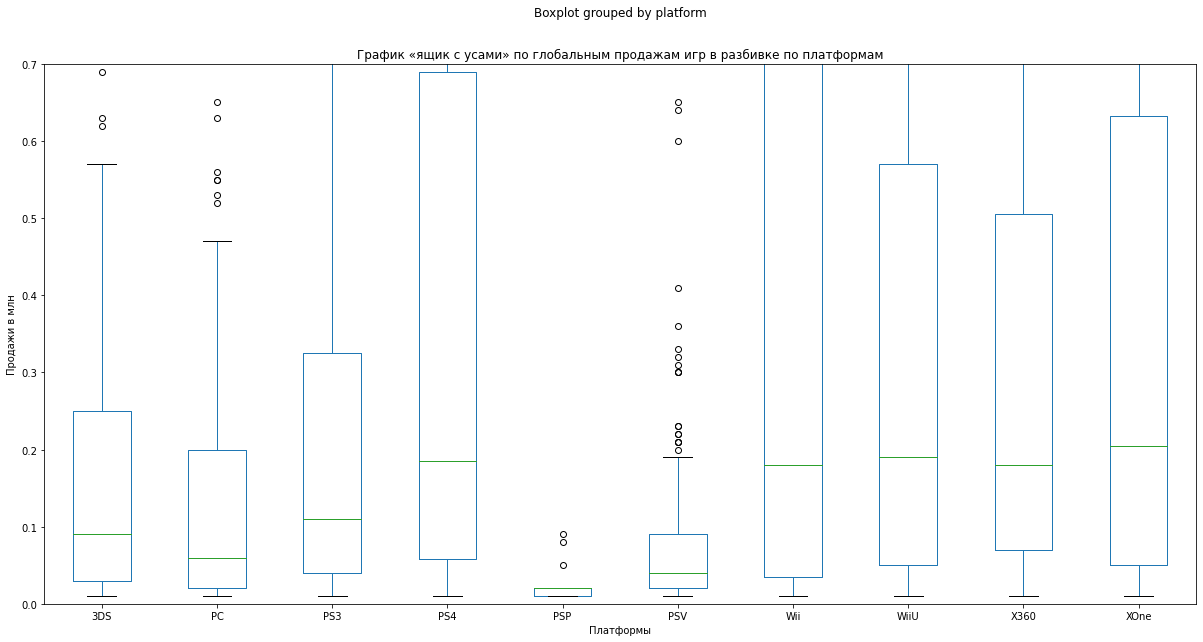

In [49]:
(data_after_2014
 .boxplot(by = 'platform', column = 'all_sales', grid = False,figsize=[20, 10])
 .set(title = 'График «ящик с усами» по глобальным продажам игр в разбивке по платформам',\
      xlabel = 'Платформы', ylabel = 'Продажи в млн')
);
plt.ylim(0,0.7);

**Вывод:**
- У платформы PS4 больше всего выбросов, данные скошены вправо, следовательно медина данных меньше среднего, значит существует данные с экстремальными значениями, которые увеличивают среднее значение, т.е. имеются очень высокие продажи у небольшого количества игр
- По платформам XOne данные также скошены вправо, значит существует данные с экстремальными значениями, которые увеличивают среднее значение, т.е. имеются очень высокие продажи у небольшого количества игр
- По платформе 3DS продажи на 3 месте видимо из-за того, что есть очень далекие выбросы, значит по каким-то нкоторым играм очень высокие продажи
- Среди 3 платформ усы больше у XOne - значит продажи игр различаются между собой больше, чем у PS4 и 3DS

### 3.7 Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков.

**PS4**

Делаем срез датасета по платформе PS4

In [50]:
data_after_2014_PS4= data.query('platform == "PS4"')

Находим корреляцию оценки критиков с продажами

In [51]:
print('Корелляция оценкок критиков с продажами:',\
      data_after_2014_PS4['all_sales'].\
      corr(data_after_2014_PS4['critic_score']).round(3))

Корелляция оценкок критиков с продажами: 0.407


Строим график корреляции оценки критиков (critic_score - ось x) с продажами (all_sales - ось y) по платформе PS4, тип графика - диаграмма рассеяния

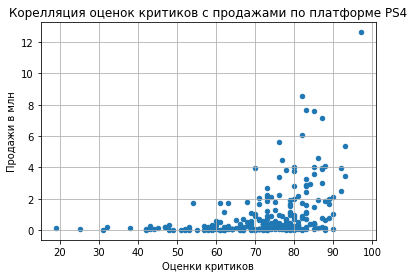

In [52]:
(
    data_after_2014_PS4
    .plot('critic_score','all_sales',grid=True, kind = 'scatter',\
          title = 'Корелляция оценок критиков с продажами по платформе PS4')
    .set(xlabel = 'Оценки критиков',ylabel = 'Продажи в млн')
);

Находим корреляцию оценки пользователей с продажами

In [53]:
print('Корелляция оценок пользователей с продажами:',data_after_2014_PS4['all_sales']
      .corr(data_after_2014_PS4['user_score']).round(3))

Корелляция оценок пользователей с продажами: -0.032


Строим график корреляции оценки пользователей (user_score - ось x) с продажами (all_sales - ось y) по платформе PS4, тип графика - диаграмма рассеяния

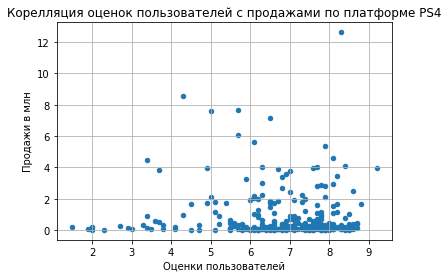

In [54]:
(data_after_2014_PS4
 .plot('user_score','all_sales',grid=True, kind = 'scatter',\
       title = 'Корелляция оценок пользователей с продажами по платформе PS4')
 .set(xlabel = 'Оценки пользователей',ylabel = 'Продажи в млн')
);

**Вывод**
- По платформе PS4 оценки критиков демонстрируют прямую, средне-слабую корреляцию с количеством продаж
- По платформе PS4 оценки пользователей корреляции с продажами не имеют

**Другие платформы - XOne**

Делаем срез датасета по платформе XOne

In [55]:
data_after_2014_XOne= data.query('platform == "XOne"')

Находим корреляции оценки критиков с продажами

In [56]:
print('Корелляция оценок критиков с продажами:',\
      data_after_2014_XOne['all_sales'].\
      corr(data_after_2014_XOne['critic_score']).round(3))

Корелляция оценок критиков с продажами: 0.417


Строим график корреляции оценки критиков (critic_score - ось x) с продажами (all_sales - ось y) по платформе XOne, тип графика - диаграмма рассеяния

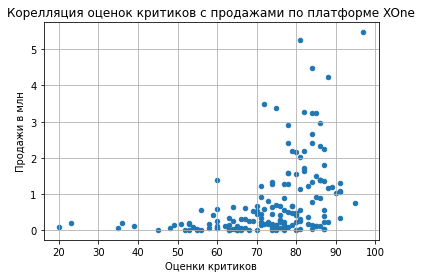

In [57]:
(
    data_after_2014_XOne
    .plot('critic_score','all_sales',grid=True, kind = 'scatter',\
          title = 'Корелляция оценок критиков с продажами по платформе XOne')
    .set(xlabel = 'Оценки критиков',ylabel = 'Продажи в млн')
);

Находим корреляцию оценки пользователей с продажами

In [58]:
print('Корелляция оценок пользователей с продажами:',data_after_2014_XOne['all_sales']
      .corr(data_after_2014_XOne['user_score']).round(3))

Корелляция оценок пользователей с продажами: -0.069


Строим график корреляции оценки пользователей (user_score - ось x) с продажами (all_sales - ось y) по платформе PS4, тип графика - диаграмма рассеяния

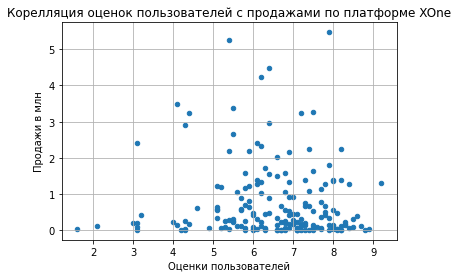

In [59]:
(data_after_2014_XOne
 .plot('user_score','all_sales',grid=True, kind = 'scatter',\
       title = 'Корелляция оценок пользователей с продажами по платформе XOne')
 .set(xlabel = 'Оценки пользователей',ylabel = 'Продажи в млн')
);

**Вывод**
- По платформе XOne оценки критиков демонстрируют прямую, слабую корреляцию с количеством продаж
- По платформе XOne оценки пользователей корреляции с продажами не имеют

**Другие платформы - 3DS**

Делаем срез датасета по платформе 3DS

In [60]:
data_after_2014_3DS = data.query('platform == "3DS"')

Находим корреляцию оценки критиков с продажами

In [61]:
print('Корелляция оценок критиков с продажами:',\
      data_after_2014_3DS['all_sales'].\
      corr(data_after_2014_3DS['critic_score']).round(3))

Корелляция оценок критиков с продажами: 0.349


Строим график корреляции оценки критиков (critic_score - ось x) с продажами (all_sales - ось y) по платформе 3DS, тип графика - диаграмма рассеяния

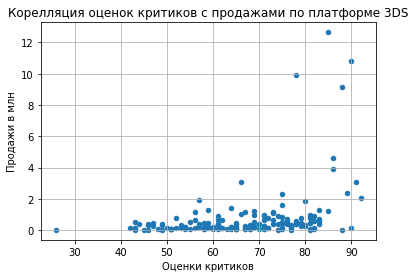

In [62]:
(
    data_after_2014_3DS
    .plot('critic_score','all_sales',grid=True, kind = 'scatter',\
          title = 'Корелляция оценок критиков с продажами по платформе 3DS')
    .set(xlabel = 'Оценки критиков',ylabel = 'Продажи в млн')
);

Находим корреляцию оценки пользователей с продажами

In [63]:
print('Корелляция оценок пользователей с продажами:',data_after_2014_3DS['all_sales']
      .corr(data_after_2014_3DS['user_score']).round(3))

Корелляция оценок пользователей с продажами: 0.222


Строим график корреляции оценки пользователей (user_score - ось x) с продажами (all_sales - ось y) по платформе PS4, тип графика - диаграмма рассеяния

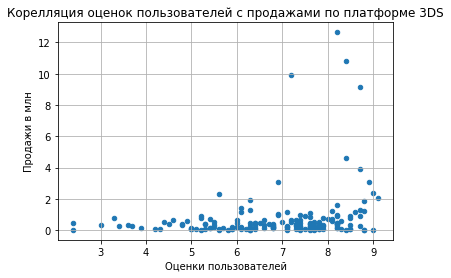

In [64]:
(data_after_2014_3DS
 .plot('user_score','all_sales',grid=True, kind = 'scatter',\
       title = 'Корелляция оценок пользователей с продажами по платформе 3DS')
 .set(xlabel = 'Оценки пользователей',ylabel = 'Продажи в млн')
);

**Вывод**
- По платформе 3DS оценки критиков демонстрируют прямую, слабую корреляцию с количеством продаж
- По платформе 3DS оценки пользователей демонстрируют прямую, очень слабую корреляцию с количеством продаж

**Другие платформы - PC**

Делаем срез датасета по платформе PC

In [65]:
data_after_2014_PC = data.query('platform == "PC"').copy()

Находим корреляции оценки критиков с продажами

In [66]:
print('Корелляция оценок критиков с продажами:',\
      data_after_2014_PC['all_sales'].\
      corr(data_after_2014_PC['critic_score']).round(3))

Корелляция оценок критиков с продажами: 0.257


Строим график корреляции оценки критиков (critic_score - ось x) с продажами (all_sales - ось y) по платформе PC, тип графика - диаграмма рассеяния

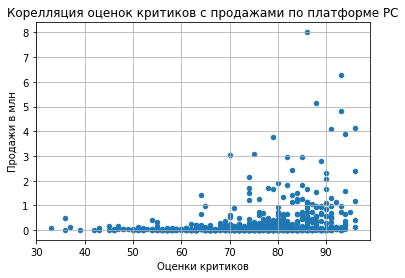

In [67]:
(
    data_after_2014_PC
    .plot('critic_score','all_sales',grid=True, kind = 'scatter',\
          title = 'Корелляция оценок критиков с продажами по платформе PC')
    .set(xlabel = 'Оценки критиков',ylabel = 'Продажи в млн')
);

Находим корреляцию оценки пользователей с продажами

In [68]:
print('Корелляция оценок пользователей с продажами:',data_after_2014_PC['all_sales']
      .corr(data_after_2014_PC['user_score']).round(3))

Корелляция оценок пользователей с продажами: 0.013


Строим график корреляции оценки пользователей (user_score - ось x) с продажами (all_sales - ось y) по платформе PC, тип графика - диаграмма рассеяния

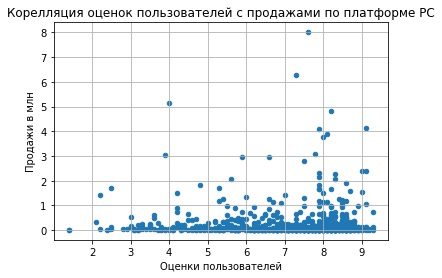

In [69]:
(data_after_2014_PC
 .plot('user_score','all_sales',grid=True, kind = 'scatter',\
       title = 'Корелляция оценок пользователей с продажами по платформе PC')
 .set(xlabel = 'Оценки пользователей',ylabel = 'Продажи в млн')
);

**Вывод**
- По платформе PC оценки критиков демонстрируют прямую, очень слабую корреляцию с количеством продаж
- По платформе PC оценки пользователей корреляции с продажами не имеют

**Общий вывод**
- у PS4, как и у XOne, PC оценки пользователей корреляции не имеют, т.е. линейной зависимости не имеют
- у 3DS в отличиие от PS4 оценки пользователей имеют прямую, хоть и слабую корреляцию с продажами игр.
- у PS4, как и у XOne, 3DS, PC оценки критиков имеют прямую корреляцию с продажами игр, однако степень зависимости выше у PS4 

**3.8 Распределение игр по жанрам**

Построим столбчатую диаграмму, где по оси x - жанр, а по оси y - продажи (медианные значения), остртируем по убыванию и увеличим масштаю графика

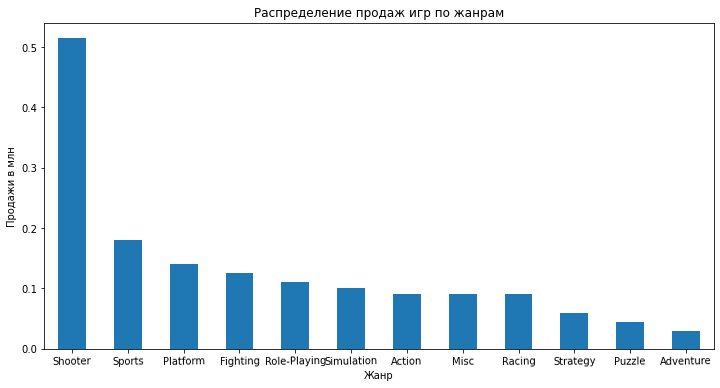

In [70]:
genre_all_sales = data_after_2014.groupby('genre')['all_sales'].median().to_frame()
 
genre_all_sales = genre_all_sales.sort_values('all_sales', ascending=False).reset_index()
 
(genre_all_sales
 .plot(x='genre', y='all_sales', kind = 'bar', figsize = (12,6),\
       title = 'Распределение продаж игр по жанрам', legend = False, rot = 1)
 .set(xlabel = 'Жанр',ylabel = 'Продажи в млн')
);

**Вывод**
- самый прибыльный и популярный жанр - шутер
- самые непопулярные жанры - приключения

<a id="step4"></a>
## 4. Портрет пользователя каждого региона

### 4.1 Самые популярные платформы (топ-5) для пользователя каждого региона

**Самые популярные платформы в мире**

Создадим новый столбец с % продаж

In [71]:
data_after_2014['share of total'] = (data_after_2014['all_sales']/data_after_2014['all_sales'].sum())*100

C:\Users\milvi\AppData\Local\Temp\ipykernel_20824\4274667340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_after_2014['share of total'] = (data_after_2014['all_sales']/data_after_2014['all_sales'].sum())*100


Сгруппируем (топ-5) по столбцу с платформами, по которым будет отражен суммарный % продаж

In [72]:
data_after_2014.groupby('platform')['share of total'].sum().sort_values(ascending = False).round(2)

platform
PS4     39.50
XOne    19.24
3DS     11.88
PS3      9.35
X360     6.61
WiiU     5.89
PC       3.71
PSV      3.07
Wii      0.70
PSP      0.05
Name: share of total, dtype: float64

Построим столбчатую диаграмму по топ-5 самых популярных платформ в мире в порядке убывания, где по оси x - платформа, по оси y - доля % продаж

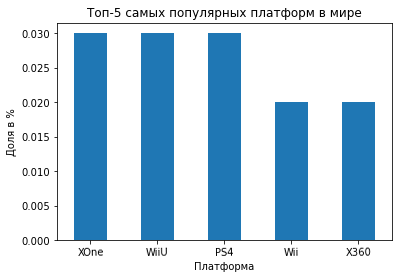

In [73]:
(data_after_2014.groupby('platform')['share of total']
 .median()
 .sort_values(ascending = False)
 .round(2)
 .head(5)
 .plot(kind = 'bar',rot=1,title = 'Топ-5 самых популярных платформ в мире')
 .set(xlabel = 'Платформа', ylabel = 'Доля в %')
);

**Самые популярные платформы в Северной Америке**

Добавим столбец с % продаж по Северной Америке

In [74]:
data_after_2014['share of total_na'] = (data_after_2014['na_sales']/data_after_2014['all_sales'].sum())*100

C:\Users\milvi\AppData\Local\Temp\ipykernel_20824\3063477521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_after_2014['share of total_na'] = (data_after_2014['na_sales']/data_after_2014['all_sales'].sum())*100


Сгруппируем (топ-5) по столбцу с платформами, по которым будет отражен суммарный % продаж в Северной Америке

In [75]:
data_after_2014.groupby('platform')['share of total_na'].sum().sort_values(ascending = False).round(2).head(5)

platform
PS4     13.52
XOne    11.14
X360     3.88
3DS      3.10
PS3      3.02
Name: share of total_na, dtype: float64

Построим столбчатую диаграмму по топ-5 самых популярных платформ в Северной Америке в порядке убывания, где по оси x - платформа, по оси y - доля % продаж

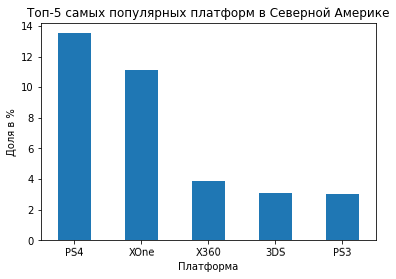

In [76]:
(data_after_2014
 .groupby('platform')['share of total_na']
 .sum()
 .sort_values(ascending = False)
 .round(2)
 .head(5)
 .plot(kind = 'bar',rot=1,title = 'Топ-5 самых популярных платформ в Северной Америке')
 .set(xlabel = 'Платформа', ylabel = 'Доля в %')
);

Создадим перменную, в воторых отраженные сумарные % продаж по миру и Северной Америке по топ-5 платформам

In [77]:
# по миру

a = data_after_2014.groupby('platform')['share of total'].sum().sort_values(ascending = False).round(2).head(5)

# по Северной Америке

b = data_after_2014.groupby('platform')['share of total_na'].sum().sort_values(ascending = False).round(2).head(5)

Выведем на экран эти переменныые, т.е. сумарные % продаж по миру и Северной Америке по топ-5 платформам

In [78]:
print('Мировые данные:',a)
print('')
print('Данные по Северной Америке:',b)

Мировые данные: platform
PS4     39.50
XOne    19.24
3DS     11.88
PS3      9.35
X360     6.61
Name: share of total, dtype: float64

Данные по Северной Америке: platform
PS4     13.52
XOne    11.14
X360     3.88
3DS      3.10
PS3      3.02
Name: share of total_na, dtype: float64


Проведем рассчеты с этими переменными

In [79]:
print('Доля продаж игр на платформе PS4 Северной Америки в общем объеме продаж:',round((b[0]*100)/a[0]))
print('')
print('Доля продаж игр на платформе XOne Северной Америки в общем объеме продаж:',round((b[1]*100)/a[1]))
print('')
print('Доля продаж игр на платформе X360 Северной Америки в общем объеме продаж:',round((b[2]*100)/a[4]))
print('')
print('Доля продаж игр на платформе 3DS Северной Америки в общем объеме продаж:',round((b[3]*100)/a[2]))
print('')
print('Доля продаж игр на платформе PS3 Северной Америки в общем объеме продаж:',round((b[4]*100)/a[3]))

Доля продаж игр на платформе PS4 Северной Америки в общем объеме продаж: 34

Доля продаж игр на платформе XOne Северной Америки в общем объеме продаж: 58

Доля продаж игр на платформе X360 Северной Америки в общем объеме продаж: 59

Доля продаж игр на платформе 3DS Северной Америки в общем объеме продаж: 26

Доля продаж игр на платформе PS3 Северной Америки в общем объеме продаж: 32


**Вывод**
- в Северной Америке популярнее всего игры на платформах PS4 и XOne
- топ 2 платформы в Северной Америке - PS4 и XOne - совпадают с топ-2 платформами в мире
- 3 платформа в Северной Америке (X360) - это 5 платформа в мире
- 4 платформа в Северной Америке (3DS) - это 3 платформа в мире
- 5 платформа в Северной Амеркике (PS3) - это 4 платформа в мире
- Продажи игр на платфоре X360 в Северной Америке вносят больший вклад в мировые продажи игр на данной платформе, чем продажи на других платформах в Северной Америке вносят вклад в мировые продажи игр на соответствующих платформах

**Самые популярные платформы в Европе**

Добавим столбец с % продаж по Европе

In [80]:
data_after_2014['share of total_eu'] = (data_after_2014['eu_sales']/data_after_2014['all_sales'].sum())*100

C:\Users\milvi\AppData\Local\Temp\ipykernel_20824\13798202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_after_2014['share of total_eu'] = (data_after_2014['eu_sales']/data_after_2014['all_sales'].sum())*100


Сгруппируем (топ-5) по столбцу с платформами, по которым будет отражен суммарный % продаж в Европе

In [81]:
data_after_2014.groupby('platform')['share of total_eu'].sum().sort_values(ascending = False).round(2).head(5)

platform
PS4     17.83
XOne     6.34
PS3      3.50
PC       2.46
3DS      2.21
Name: share of total_eu, dtype: float64

Построим столбчатую диаграмму по топ-5 самых популярных платформ в Европе в порядке убывания, где по оси x - платформа, по оси y - доля % продаж

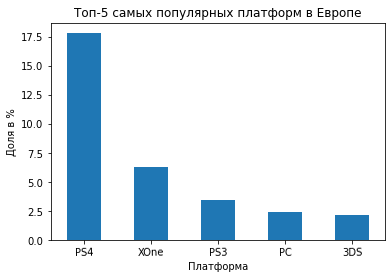

In [82]:
(data_after_2014
 .groupby('platform')['share of total_eu']
 .sum()
 .sort_values(ascending = False)
 .round(2).head(5)
 .plot(kind = 'bar',rot=1,title = 'Топ-5 самых популярных платформ в Европе')
 .set(xlabel = 'Платформа', ylabel = 'Доля в %')
);

Создадим перменную, в воторых отраженные сумарные % продаж по миру и Европе по топ-5 платформам

In [83]:
# по миру

a = data_after_2014.groupby('platform')['share of total'].sum().sort_values(ascending = False).round(2).head(8)

# по Европе

b = data_after_2014.groupby('platform')['share of total_eu'].sum().sort_values(ascending = False).round(2).head(5)

Выведем на экран эти переменныые, т.е. сумарные % продаж по миру и Европе по топ-5 платформам

In [84]:
print('Мировые данные:',a)
print('')
print('Данные по Европе:',b)

Мировые данные: platform
PS4     39.50
XOne    19.24
3DS     11.88
PS3      9.35
X360     6.61
WiiU     5.89
PC       3.71
PSV      3.07
Name: share of total, dtype: float64

Данные по Европе: platform
PS4     17.83
XOne     6.34
PS3      3.50
PC       2.46
3DS      2.21
Name: share of total_eu, dtype: float64


Проведем рассчеты с этими переменными

In [85]:
print('Доля продаж игр на платформе PS4 Европы в общем объеме продаж:',round((b[0]*100)/a[0]))
print('')
print('Доля продаж игр на платформе XOne Европы в общем объеме продаж:',round((b[1]*100)/a[1]))
print('')
print('Доля продаж игр на платформе PS3 Европы в общем объеме продаж:',round((b[2]*100)/a[3]))
print('')
print('Доля продаж игр на платформе PC Европы в общем объеме продаж:',round((b[3]*100)/a[6]))
print('')
print('Доля продаж игр на платформе 3DS Европы в общем объеме продаж:',round((b[4]*100)/a[2]))

Доля продаж игр на платформе PS4 Европы в общем объеме продаж: 45

Доля продаж игр на платформе XOne Европы в общем объеме продаж: 33

Доля продаж игр на платформе PS3 Европы в общем объеме продаж: 37

Доля продаж игр на платформе PC Европы в общем объеме продаж: 66

Доля продаж игр на платформе 3DS Европы в общем объеме продаж: 19


**Вывод**
- в Европе популярнее всего игры на платформе PS4
- топ 2 платформы в Европе - PS4 и XOne - совпадают с топ-2 платформами в мире
- 3 платформа в Европы (PS3) - это 4 платформа в мире
- 4 платформа в Европы (PC) - это 7 платформа в мире
- 5 платформа в Европы (3DS) - это 3 платформа в мире
- Продажи игр на платфоре PC в Европе вносят больший вклад в мировые продажи игр на данной платформе, чем продажи на других платформах в Европе вносят вклад в мировые продажи игр на соответствующих платформах

**Самые популярные платформы в Японии**

Добавим столбец с % продаж по Японии

In [86]:
data_after_2014['share of total_jp'] = (data_after_2014['jp_sales']/data_after_2014['all_sales'].sum())*100

C:\Users\milvi\AppData\Local\Temp\ipykernel_20824\2641847313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_after_2014['share of total_jp'] = (data_after_2014['jp_sales']/data_after_2014['all_sales'].sum())*100


Сгруппируем (топ-5) по столбцу с платформами, по которым будет отражен суммарный % продаж в Японии

In [87]:
data_after_2014.groupby('platform')['share of total_jp'].sum().sort_values(ascending = False).round(2).head(5)

platform
3DS     6.06
PS4     2.06
PSV     1.99
PS3     1.54
WiiU    1.00
Name: share of total_jp, dtype: float64

Построим столбчатую диаграмму по топ-5 самых популярных платформ в Японии в порядке убывания, где по оси x - платформа, по оси y - доля % продаж

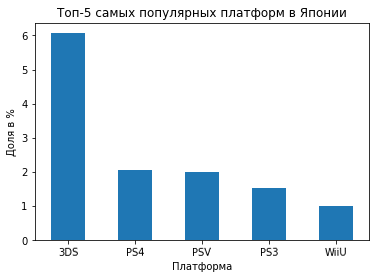

In [88]:
(
    data_after_2014.groupby('platform')['share of total_jp']
    .sum()
    .sort_values(ascending = False)
    .round(2)
    .head(5)
    .plot(kind = 'bar',rot=1,title = 'Топ-5 самых популярных платформ в Японии')
    .set(xlabel = 'Платформа', ylabel = 'Доля в %')
);

Создадим перменную, в воторых отраженные сумарные % продаж по миру и Японии по топ-5 платформам

In [89]:
# по миру

a = data_after_2014.groupby('platform')['share of total'].sum().sort_values(ascending = False).round(2).head(8)

# по Японии

b = data_after_2014.groupby('platform')['share of total_jp'].sum().sort_values(ascending = False).round(2).head(5)

Выведем на экран эти переменныые, т.е. сумарные % продаж по миру и Японии по топ-5 платформам

In [90]:
print('Мировые данные:',a)
print('')
print('Данные по Японии:',b)

Мировые данные: platform
PS4     39.50
XOne    19.24
3DS     11.88
PS3      9.35
X360     6.61
WiiU     5.89
PC       3.71
PSV      3.07
Name: share of total, dtype: float64

Данные по Японии: platform
3DS     6.06
PS4     2.06
PSV     1.99
PS3     1.54
WiiU    1.00
Name: share of total_jp, dtype: float64


Проведем рассчеты с этими переменными

In [91]:
print('Доля продаж игр на платформе 3DS Японии в общем объеме продаж:',round((b[0]*100)/a[2]))
print('')
print('Доля продаж игр на платформе PS4 Японии в общем объеме продаж:',round((b[1]*100)/a[0]))
print('')
print('Доля продаж игр на платформе PSV Японии в общем объеме продаж:',round((b[2]*100)/a[7]))
print('')
print('Доля продаж игр на платформе PS3 Японии в общем объеме продаж:',round((b[3]*100)/a[3]))
print('')
print('Доля продаж игр на платформе WiiU Японии в общем объеме продаж:',round((b[4]*100)/a[5]))

Доля продаж игр на платформе 3DS Японии в общем объеме продаж: 51

Доля продаж игр на платформе PS4 Японии в общем объеме продаж: 5

Доля продаж игр на платформе PSV Японии в общем объеме продаж: 65

Доля продаж игр на платформе PS3 Японии в общем объеме продаж: 16

Доля продаж игр на платформе WiiU Японии в общем объеме продаж: 17


**Вывод**
- в Японии популярнее всего игры на платформе 3DS
- по топ-5 продажи игр в Японии не совпадает с мировыми продажами
- 1 платформа в Японии (3DS) - это 3 платформа в мире
- 2 платформа в Японии  (PS4) - это 2 платформа в мире
- 3 платформа в Японии (PSV) - это 8 платформа в мире
- 4 платформа в Японии (PS3) - это 4 платформа в мире
- 5 платформа в Японии (WiiU) - это 6 платформа в мире
- Продажи игр на платфоре PSV в Японии вносят больший вклад в мировые продажи игр на данной платформе, чем продажи на других платформах в Японии вносят вклад в мировые продажи игр на соответствующих платформах

**Общий вывод**
- Больший вклад в продажи игр вносят Северная Америка и Европа.
- Самые популярные платформы - PS4 (больший вклад вносит Европа) и XOne (больший вклад вносит Северная Америка).

### 4.2 Самые популярные жанры (топ-5) для пользователя каждого региона

**Самые популярные жанры в мире**

Сгруппируем (топ-5) по столбцу с жанрами, по которым будет отражен суммарный % продаж в мире (суммарный % - медиана)

In [92]:
data_after_2014.groupby('genre')['share of total'].median().sort_values(ascending = False).round(2)

genre
Shooter         0.07
Sports          0.02
Platform        0.02
Fighting        0.02
Role-Playing    0.02
Simulation      0.01
Action          0.01
Misc            0.01
Racing          0.01
Strategy        0.01
Puzzle          0.01
Adventure       0.00
Name: share of total, dtype: float64

Построим столбчатую диаграмму по топ-5 самых популярных жанров в мире в порядке убывания, где по оси x - платформа, по оси y - доля % продаж (доля % продаж - медиана)

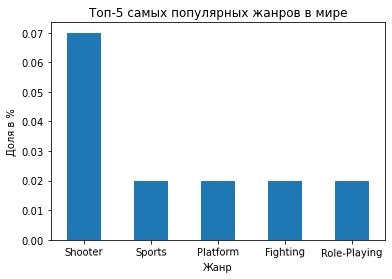

In [93]:
(
    data_after_2014
.groupby('genre')['share of total']
.median().sort_values(ascending = False)
.round(2)
.head(5)
.plot(kind = 'bar',rot=1,title = 'Топ-5 самых популярных жанров в мире')
.set(xlabel = 'Жанр', ylabel = 'Доля в %')
);

**Самые популярные жанры в Северной Америке**

Сгруппируем (топ-5) по столбцу с жанрами, по которым будет отражен суммарный % продаж в Северной Америке (суммарный % - медиана)

In [94]:
(
    data_after_2014
    .groupby('genre')['share of total_na']
    .median()
    .sort_values(ascending = False)
    .round(2)
    .head(5)
)

genre
Shooter     0.03
Platform    0.01
Sports      0.01
Fighting    0.01
Racing      0.00
Name: share of total_na, dtype: float64

Построим столбчатую диаграмму по топ-5 самых популярных жанров в Северной Америке в порядке убывания, где по оси x - платформа, по оси y - доля % продаж (доля % продаж - медиана)

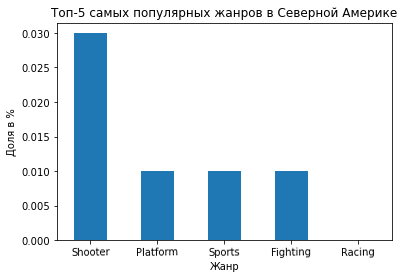

In [95]:
(
    data_after_2014
    .groupby('genre')['share of total_na']
    .median()
    .sort_values(ascending = False)
    .round(2)
    .head(5)
    .plot(kind = 'bar',rot=1,title = 'Топ-5 самых популярных жанров в Северной Америке')
    .set(xlabel = 'Жанр', ylabel = 'Доля в %')
);

**Вывод**
- в Северной Америке популярне всего игры в жанре "шутер" (в мире также), затем идет жанры "платформа", "спорт", "драки" и "гонки"

***Самые популярные жанры в Европе***

Определим график топ-5 самых популярных жанров в Европе в порядке убывания (% продаж - медиана)

In [96]:
(
    data_after_2014
    .groupby('genre')['share of total_eu']
    .median()
    .sort_values(ascending = False)
    .round(2)
    .head(5)
)

genre
Shooter       0.03
Platform      0.01
Racing        0.01
Sports        0.01
Simulation    0.00
Name: share of total_eu, dtype: float64

Посмотрим график топ-5 самых популярных жанров в Европе в порядке убывания (% продаж - медиана)

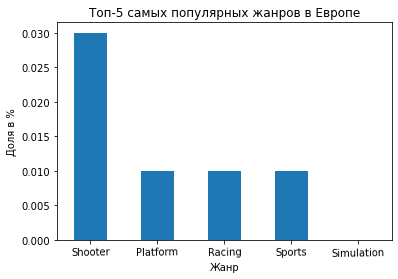

In [97]:
(data_after_2014
 .groupby('genre')['share of total_eu']
 .median()
 .sort_values(ascending = False)
 .round(2).head(5)
 .plot(kind = 'bar',rot=1,title = 'Топ-5 самых популярных жанров в Европе')
 .set(xlabel = 'Жанр', ylabel = 'Доля в %')
);

**Вывод**
- в Европе, как и в мире, и в Северной Америке, популярнее всего игры в жанре "шутер", затем идет "платформа"(как и в Северной Америке), потом "гонки", "спорт" и "симуляция"

**Самые популярные жанры в Японии**

Определим топ-5 самых популярных жанров в Японии в порядке убывания (% продаж - медиана)

In [98]:
(
    data_after_2014
.groupby('genre')['share of total_jp']
.median()
.sort_values(ascending = False)
.round(2)
.head(5)
)

genre
Role-Playing    0.01
Fighting        0.00
Puzzle          0.00
Action          0.00
Adventure       0.00
Name: share of total_jp, dtype: float64

Посмотрим график топ-5 самых популярных жанров в Японии в порядке убывания (% продаж - медиана)

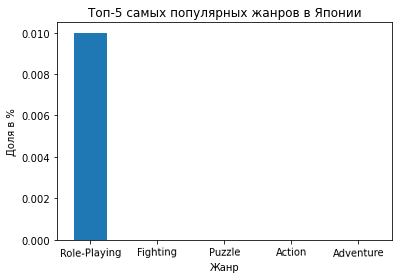

In [99]:
(
    data_after_2014
    .groupby('genre')['share of total_jp']
    .median()
    .sort_values(ascending = False)
    .round(2)
    .head(5)
    .plot(kind = 'bar',rot=1,title = 'Топ-5 самых популярных жанров в Японии')
    .set(xlabel = 'Жанр', ylabel = 'Доля в %')
);

**Вывод**
- в Японии популярнее всего игры в жанре "ролевые"
- Япония не вносит особый вклад в Продажи в Америке

**Общий вывод:**
- самые популярные жанры в мире - это шутер и спорт. Однако в Северной Америке и Европе популярнее спорта - платформа.

### 4.3 Влияние рейтинга ESRB на продажи в отдельном регионе**

<div style="border-radius: 15px; border: 3px solid Black; padding: 15px;">
<b>Для информации:</b>
    
- M - Для взрослых
- E - Для всех
- T - Подросткам (от 13 лет)
- E10+ - Для всех от 10 лет и старше

**Северная Америка**

Определим топ-5 жанров в Северной Америке

In [100]:
data_after_2014.groupby('rating')['na_sales'].sum().sort_values(ascending = False).round(2)

rating
M          96.42
unrated    64.72
E          50.74
T          38.95
E10+       33.23
Name: na_sales, dtype: float64

Посмотрим столбчатую диаграмму топ-5 жанров в Северной Америке

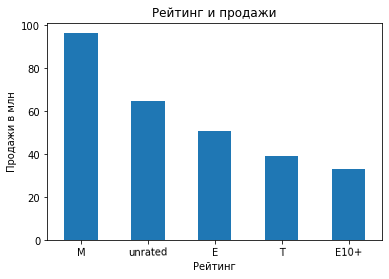

In [101]:
(
    data_after_2014
    .groupby('rating')['na_sales']
    .sum()
    .sort_values(ascending = False)
    .round(2).head(5)
    .plot(kind = 'bar',rot=1,title = 'Рейтинг и продажи')
    .set(xlabel = 'Рейтинг', ylabel = 'Продажи в млн')
);

**Вывод:**
- больше всего продаж тех игр в Северной Америке, у которых рейтинг - для взрослых

**Европа**

Определим топ-5 жанров в Европе

In [102]:
data_after_2014.groupby('rating')['eu_sales'].sum().sort_values(ascending = False).round(2).head()

rating
M          93.44
unrated    58.95
E          58.06
T          34.07
E10+       26.16
Name: eu_sales, dtype: float64

Построим столбчатую диаграмму топ-5 жанров в Европе

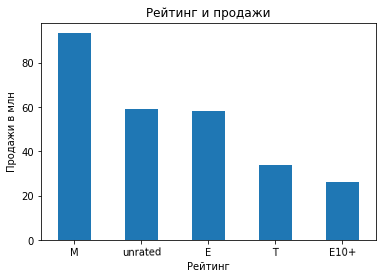

In [103]:
(
    data_after_2014
    .groupby('rating')['eu_sales']
    .sum().sort_values(ascending = False)
    .round(2)
    .head(5)
    .plot(kind = 'bar',rot=1,title = 'Рейтинг и продажи')
    .set(xlabel = 'Рейтинг', ylabel = 'Продажи в млн')
);

**Вывод:**
- больше всего продаж тех игр в Европе, у которых рейтинг - для взрослых

**Япония**

Определим топ-5 жанров в Японии

In [104]:
data_after_2014.groupby('rating')['jp_sales'].sum().sort_values(ascending = False).round(2).head()

rating
unrated    56.90
T          14.78
E           8.94
M           8.01
E10+        4.46
Name: jp_sales, dtype: float64

Посмотрим столбчатую диаграмму топ-5 жанров в Японии

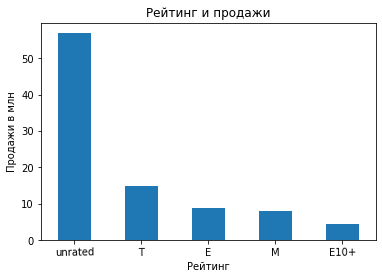

In [105]:
(
    data_after_2014
    .groupby('rating')['jp_sales']
    .sum().sort_values(ascending = False)
    .round(2)
    .head(5)
    .plot(kind = 'bar',rot=1,title = 'Рейтинг и продажи')
    .set(xlabel = 'Рейтинг', ylabel = 'Продажи в млн')
);

**Вывод:**
- больше всего продаж тех игр в Японии, у которых рейтинг - неопределен

<a id="step5"></a>
## 5. Проверка гипотез

**Первая гипотеза**
- Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC разные

Удалим те строки, в которой в столбце user_score отсутствуют данные

In [106]:
data_after_2014 = data_after_2014.dropna(subset = ['user_score'])

Проверим статистическую гипотезу

In [107]:
from scipy import stats as st
h_xone = data_after_2014['user_score'][data_after_2014['platform'] == "XOne"]
h_pc = data_after_2014['user_score'][data_after_2014['platform'] == "PC"]
results = st.ttest_ind(h_xone,h_pc,equal_var=False)
alpha = 0.05
print(results.pvalue.round(2))
if results.pvalue < alpha:
    print('Отвергнем нулевую гипотезу')
else:
    print('Не получится отвергнуть нулевую гипотезу')

0.12
Не получится отвергнуть нулевую гипотезу


**Вывод:**
- Нет значимого отличия между средними пользовательских рейтингов платформ Xbox One и PC

**Вторая гипотеза**
- Нулевая гипотеза - Средние пользовательские рейтинги жанров Action и Sports разные.
- Альтернативная гипотеза - Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Проверим статистическую гипотезу

In [108]:
from scipy import stats as st
h_action = data_after_2014['user_score'][data_after_2014['genre'] == "Action"]
h_sports = data_after_2014['user_score'][data_after_2014['genre'] == "Sports"]
results = st.ttest_ind(h_action,h_sports,equal_var=False)
alpha = 0.05
print(results.pvalue)
if results.pvalue > alpha:
    print('Отвергнем нулевую гипотезу')
else:
    print('Не получится отвергнуть нулевую гипотезу')

1.1825550382644557e-14
Не получится отвергнуть нулевую гипотезу


**Вывод:**
- Есть значимые отличия между средними пользовательских рейтингов жанров Action и Sports

<a id="step6"></a>
## 6. Выводы по проекту

<div style="border-radius: 15px; border: 3px solid Black; padding: 15px;">
    <b> Выводы по проекту:</b>
    
- После 2013 года ситуация по продажам игр начала ухудшаться
- Средний срок существования одной платформы - 9,4 лет
- Средний срок роста продаж по одной платформе - 4,1 лет
- Средний срок ухудшения продаж по одной платформе - 5,3 лет
- Самая популярная платформа в мире - PS4, за ней идут платформы XOne и 3DS
- Самая популярная платформа в Северной Америке - PS4, за ней идут платформы XOne и X360
- Самая популярная платформа в Европе - PS4, за ней идут платформы XOne и PS3
- Самая популярная платформа в Японии - 3DS, за ней идут платформы PS4 и PSV
- Больший вклад в продажи игр вносит Северная Америка и Европа. Северная Америка вносит больший вклад в продажи игр на XOne, Европа вносит больший вклад в продажи игр на PS4
- На текущий момент ни одна из платформ не имеет рост, можно предположить, что в скором времени появится новая платформа (например, PS5), т.к. судя по графикам, при ухудшении продаж на одни платформах, появляются новые платформы
- у PS4, как и у XOne, PC оценки пользователей корреляции не имеют, т.е. линейной зависимости не имеют
- у 3DS в отличиие от PS4 оценки пользователей имеют прямую, хоть и слабую корреляцию с продажами игр.
- у PS4, как и у XOne, 3DS, PC оценки критиков имеют прямую корреляцию с продажами игр, однако степень зависимости выше у PS4 
- Самый популярный жанр игр в мире - "шутер", за ним идет "спорт", "платформа" и "драки" и "ролевые игры"
- Самые популярный жанр игр в Северной Америке - это "шутер", за ним идет "платформа", "спорт" и "драки"
- Самый популярный жанр игр в Европе - "шутер", за ним идет "платформа", "гонки", "спорт"
- Самый популярный жанр игр в Японии - "ролевые"
- В Северной Америке и Европе больше всего покупают игры с рейтингом "для взрослых" и без "рейтинга"
- В Японии больше всего покупают игры без рейтинга
- Средние пользовательские рейтинги платформ Xbox One и PC примерно одинаковые.
- Средние пользовательские рейтинги жанров Action и Sports разные.

<div style="border-radius: 15px; border: 3px solid Black; padding: 15px;">
<b>Обобщенный вывод:</b>
    
- Таким образом можно сказать, что в большей степени стоит ориентироваться на рынок Северной Америки и Европы, т.к. большую прибыль с игр получают именно с этих рынков.
- Предпочтения в Северной Америке и Европе по играм очень схожи, для аудитории из этих стран имеет смысл увеличить количество игр на платформах PS4 и XOne, жанров "шутер" и "платформа", с рейтингом "для взрослых" и без рейтинга
- Япония не вносит большой вклад в увеличение продаж от игр, однако всеже стоит продавать некоторые игры на платформе 3DS, жанра "ролевые", без рейтинга
- При выборе игр для продаж стоит ориентировтаться на рейтинг критиков
- Стоит помнить, что скоро появится новая платформа